## 计算图是用来描述运算的有向无环图  
* 结点（node）:数据，向量，矩阵，张量
* 边（edge）：运算，加减乘除卷积等。

例子：用计算图表示y = (x+w)*(w+1)  
a =x+w  
b = w+1  
y = a*b

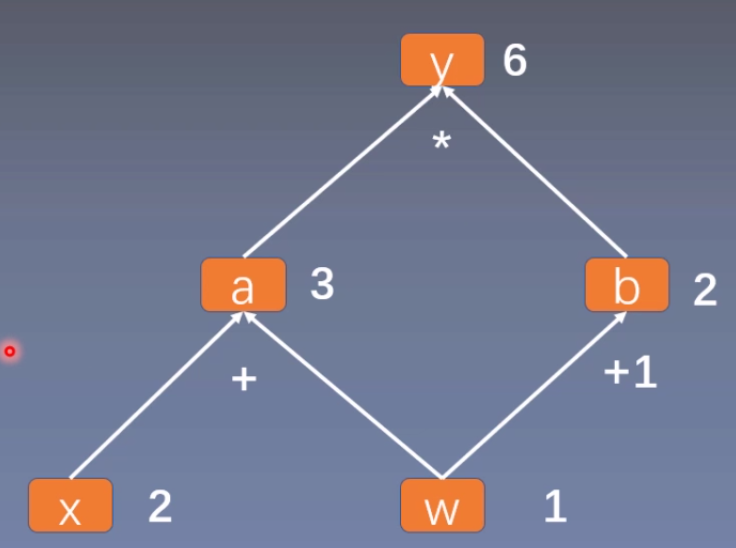

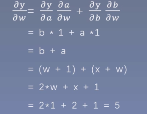

In [44]:
import torch

In [59]:
w = torch.tensor([1.],requires_grad=True)
x = torch.tensor([2.],requires_grad=True)
a = torch.add(w,x)
b = torch.add(w,1)
y = torch.mul(a,b)

In [60]:
y.backward(retain_graph=True)

In [61]:
print(w.grad,x.grad)

tensor([5.]) tensor([2.])


叶子结点：用户创建的结点称为叶子结点，如x,w  
is_leaf:指示张量是否为叶子结点

In [28]:
print(w.is_leaf,x.is_leaf,a.is_leaf,b.is_leaf)

True True False False


查看梯度，除了叶子结点外，其他的梯度会被释放掉

In [29]:
print(w.grad,x.grad,a.grad,b.grad)

tensor([5.]) tensor([2.]) None None


如果要保留非叶子结点的梯度，需要用retain_grad,保存梯度

In [30]:
a.retain_grad

<bound method Tensor.retain_grad of tensor([3.], grad_fn=<AddBackward0>)>

## autograd-自动求导系统

torch.autograd.backward  
功能：自动求取梯度  
* tensors:用于求导的张量，如loss
* retain_graph:保存计算图
* create_graph:创建倒数计算图，用于高阶求导
* grad_tensors：多梯度权重

y.backward直接调用了torch.autograd.backward方法实现的   
当调用两次backward，会显示被释放过了  
这时候就需要调用 retain_graph:保存计算图

In [31]:
y.backward()

In [62]:
y1 = torch.add(a,b)

In [63]:
loss = torch.cat([y,y1],dim=0)

In [64]:
loss

tensor([6., 5.], grad_fn=<CatBackward>)

In [65]:
grad_tensor=torch.tensor([1.,1.])

In [72]:
w.grad.zero_()

tensor([0.])

In [73]:
loss.backward(gradient=grad_tensor,retain_graph=True)

In [74]:
print(w.grad)#5*1+2*1

tensor([7.])


In [77]:
grad_tensor = torch.tensor([1.,2.])

In [81]:
w.grad.zero_()

tensor([0.])

In [82]:
loss.backward(gradient=grad_tensor,retain_graph=True)

In [83]:
print(w.grad)#5*1+2*2

tensor([9.])


求取梯度

In [93]:
X = torch.tensor([3.],requires_grad=True)
Y = torch.pow(X,2)

In [94]:
grad_1 = torch.autograd.grad(Y,X,create_graph=True)#

In [95]:
print(grad_1)

(tensor([6.], grad_fn=<MulBackward0>),)


In [96]:
grad_2 = torch.autograd.grad(grad_1[0],X)

In [97]:
print(grad_2)

(tensor([2.]),)
